<a href="https://colab.research.google.com/github/FGalvao77/Otimizacao-de-rota-com-algoritmo-geneticos-em-Python/blob/main/Otimiza%C3%A7%C3%A3o_de_rota_com_algoritmo_gen%C3%A9tico_em_Python_%5BDEAP%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Otimização de rota com _algoritmo genético_ em Python [DEAP]**
---
---

**Problema do caixeiro-viajante**

O **Problema do Caixeiro Viajante (_PCV_)** é um problema que tenta determinar a menor rota para percorrer uma série de cidades (visitando uma única vez cada uma delas), retornando à cidade de origem. Ele é um problema de [otimização](https://pt.wikipedia.org/wiki/Otimiza%C3%A7%C3%A3o_combinat%C3%B3ria) [NP-difícil](https://pt.wikipedia.org/wiki/NP-dif%C3%ADcil) inspirado na necessidade dos vendedores em realizar entregas em diversos locais (as cidades) percorrendo o menor caminho possível, reduzindo o tempo necessário para a viagem e os possíveis custos com transporte e combustível.

- Fonte: https://pt.wikipedia.org/wiki/Problema_do_caixeiro-viajante



Segue abaixo o grafo direcionado representado o nosso problema!

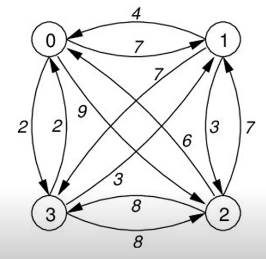

**Descrição do problema:**<br>
>Encontrar a melhor rota que percorre todas as distribuidoras de bebidas.
- `melhor` = _menor distância_.

E para esse desafio, utilizaremos uma estrutura de _algoritmos genéticos evolucionário_, nesse caso, o `DEAP` - Distributed Evolutionary Algorithms in Python | Algoritmos Evolutivos Distribuídos em Python.

<img src='https://deap.readthedocs.io/en/master/_images/deap_long.png'>

- https://deap.readthedocs.io/en/master/

- https://pypi.org/project/deap/

In [1]:
# instalando a biblioteca
!pip install deap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 139 kB 11.9 MB/s 


**Biblioteca `DEAP`**
- _creator_: criar indivíduos e a função de aptidão;
- _base_: registrar os elementos do algoritmo genético;
- _tools_: permite utilizar as funções de operadores e,
- _algorithms_: executa o algoritmo genético.

In [2]:
# importando as funções da biblioteca "deap"
from deap import (creator,      # criar indivíduos e a função de aptidão
                  base,         # registrar elementos do algoritmo genético
                  tools,        # permite utilizar as funções de operadores
                  algorithms    # executa o algoritmo genético
                  )

# importando as demais bibliotecas 
import numpy as np                  # recursos matemáticos
import matplotlib.pyplot as plt     # visualização gráfica
import seaborn as sns               # visualização gráfica
import warnings                     # ignorar mensagens de alerta

# configurando o ambiente
%matplotlib inline
sns.set()
# plt.style.use('ggplot')
warnings.filterwarnings('ignore') 

**Criação | função de aptidão**

- Especificar que tipo de problema queremos resolver.
- Minimização ou maximização?
- Único objetivo ou múltiplas funções objetivos?

```python
# minimização
creator.create('FitnessMin', base.Fitness, weights=(-1.0, ))  

# maximização      
creator.create('FitnessMax', base.Fitness, weights=(1.0, ))   

# múltiplos objetivos   
creator.create('FitnessMult', base.Fitness, weights=(-1.0, 1.0)) 
```

- Por padrão, DEAP considera que todos os problemas são múltiplos objetivos.
- Este tratamento uniform facilita a programação.
Logo, a minha função objetivo tem que ser uma _tupla_ (e.g., par) de pesos.
- Como queremos "minimizar" a distância, então utilizaremos a função de minimização.

```python
# minimização
creator.create('FitnessMin', base.Fitness, weights=(-1.0, )) 
```

**Criação | cromossomo**

- Como os indivíduos vão ser representados?
> Isto também é especificado usando a função _create_.

```python
creator.create('EstrIndividuo', list, fitness=creator.FitnessMin)
```

- Representacão comum é uma lista.
- Cada elemento da lista representa um gene.

**Registro**
- Definindo a base de definicões.

```python
toolbox = base.Toolbox()
```
> Toolbox = Ferramentas
- Onde será registrado os objetivos e elementos do algoritmo genético.

**Registro | número de genes**
- Nosso cromossomo tem uma estrutura de lista.
- Temos que, especificar o tamanho desta, i.e., o número _m_ de genes.
- Cromossomo é uma permutação dos elementos.

```python
n = 4
toolbox.register('Genes', np.random.permutation, n)
```

In [3]:
# definindo a estrutura para registar os objetivos e elementos do algoritmo genético
toolbox = base.Toolbox()    # instanciando o objeto para base de definições
n = 4                       # número limite de genes | no nosso caso, número de nós (distribuidoras)

# criação | aptidão: minimização
creator.create('FitnessMin', base.Fitness, weights=(-1.0, ))    

# criação | cromossomo: estutura do indivíduo
creator.create('EstrIndividuo', list, fitness=creator.FitnessMin)

# registro | números de genes
toolbox.register('Genes', np.random.permutation, n)

# registro | indivíduos
toolbox.register('Individuos', tools.initIterate, 
                 creator.EstrIndividuo, toolbox.Genes)

# registro | população
toolbox.register('Populacao', tools.initRepeat, list, 
                 toolbox.Individuos)

In [4]:
# instanciando o tamanho da população
pop = toolbox.Populacao(n=10_000)

In [5]:
# visualizando o objeto
pop[:10]

[[3, 1, 0, 2],
 [1, 3, 0, 2],
 [0, 1, 2, 3],
 [0, 2, 1, 3],
 [2, 0, 3, 1],
 [1, 2, 3, 0],
 [3, 1, 2, 0],
 [0, 1, 2, 3],
 [3, 0, 2, 1],
 [3, 1, 0, 2]]

In [6]:
# registro | crossover
# "mate", operador para reprodução
toolbox.register('mate', tools.cxPartialyMatched)               
# "mutate", operador para mutação | "indpb", probabilidade de um índice de ser movimentado, 10%
toolbox.register('mutate', tools.mutShuffleIndexes, indpb=0.1)
# "select", operador de seleção | "tournize", tamanho por torneio
toolbox.register('select', tools.selTournament, tournsize=2)    

In [7]:
# matriz 4x4 | origem de destino
dist = [
    [0, 7, 9, 2],
    [4, 0, 3, 7],
    [6, 7, 0, 8],
    [2, 3, 8, 0]
]

# visualizando a matriz
print(dist)

[[0, 7, 9, 2], [4, 0, 3, 7], [6, 7, 0, 8], [2, 3, 8, 0]]


In [8]:
# função de aptidão
def aptidao(individuo):
    f = 0

    for i in range(n - 1):
        local_1 = individuo[i]
        local_2 = individuo[i + 1]

        distancia = dist[local_1][local_2]
        f = f + distancia

    return f,   # usamos a vírgula para retornar uma aptidão multi objetivo

In [9]:
# registro da função de aptidão para avaliar o indivíduo
toolbox.register('evaluate', aptidao)

In [10]:
# função para salvar as aptidões (valores) de cada indivíduo
def estatisticaSalvar(individual):
    return individual.fitness.values

In [11]:
# instanciando o objeto 
estatistica = tools.Statistics(estatisticaSalvar)

# dados estatístico de cada geração
estatistica.register('mean', np.mean)   # média
estatistica.register('min', np.min)     # mínimo
estatistica.register('max', np.max)     # máximo

**Nova geração | Hall of Fame**
- A cada geração o melhor indivíduo é inserido no _hall_ da fama.
- Conter um arquivo das melhores soluções.
- Pode ser utilizado para auxiliar no processo de _crossover_.

In [12]:
# "hall of fame" | quantos valores ótimos será salvo?
hof = tools.HallOfFame(1)   # salvando um indivíduo

In [13]:
# executando o algoritmo
result, log = algorithms.eaSimple(
    pop,                # população
    toolbox,            # toolbox
    cxpb=0.8,           # probabilidade de crossover | 80%
    mutpb=0.1,          # probabilidade de mutação | 10%
    stats=estatistica,  # estatística
    ngen=50,            # número de gerações
    halloffame=hof,     # hall of fame
    verbose=True,       # visualizar os resultados: True ou False
)

# result: retorna os valores finais
# log: retorna o resultado de geração a geração

gen	nevals	mean   	min	max
0  	10000 	16.4618	8  	23 
1  	8171  	15.4302	8  	23 
2  	8252  	14.8964	8  	23 
3  	8224  	14.717 	8  	23 
4  	8143  	14.4114	8  	23 
5  	8267  	14.3033	8  	23 
6  	8188  	14.0099	8  	23 
7  	8207  	13.5145	8  	23 
8  	8143  	12.8423	8  	23 
9  	8127  	11.651 	8  	23 
10 	8218  	10.3244	8  	23 
11 	8280  	9.0683 	8  	23 
12 	8170  	8.4837 	8  	23 
13 	8204  	8.3571 	8  	23 
14 	8256  	8.357  	8  	23 
15 	8160  	8.3623 	8  	23 
16 	8193  	8.3732 	8  	23 
17 	8116  	8.3302 	8  	23 
18 	8243  	8.3219 	8  	23 
19 	8315  	8.3059 	8  	23 
20 	8207  	8.3521 	8  	23 
21 	8186  	8.3599 	8  	23 
22 	8187  	8.3314 	8  	23 
23 	8263  	8.3575 	8  	23 
24 	8265  	8.3464 	8  	23 
25 	8177  	8.3464 	8  	23 
26 	8153  	8.3598 	8  	23 
27 	8104  	8.3305 	8  	23 
28 	8185  	8.3529 	8  	23 
29 	8192  	8.3277 	8  	23 
30 	8226  	8.3262 	8  	23 
31 	8284  	8.3371 	8  	23 
32 	8272  	8.3376 	8  	23 
33 	8351  	8.3457 	8  	23 
34 	8242  	8.3456 	8  	23 
35 	8267  	8.3352 	8  	23 
3

In [14]:
# visualizando os valores finais
result[:1]

[[1, 3, 0, 2]]

In [15]:
# visualizando o "hall of fame"
print(hof)

[[0, 3, 1, 2]]


In [16]:
# aptidão?
melhor_individuo = hof[0]

print(melhor_individuo)
aptidao(melhor_individuo)

[0, 3, 1, 2]


(8,)

In [17]:
# visualizando o resultado de geração a geraçãp
print(log)

gen	nevals	mean   	min	max
0  	10000 	16.4618	8  	23 
1  	8171  	15.4302	8  	23 
2  	8252  	14.8964	8  	23 
3  	8224  	14.717 	8  	23 
4  	8143  	14.4114	8  	23 
5  	8267  	14.3033	8  	23 
6  	8188  	14.0099	8  	23 
7  	8207  	13.5145	8  	23 
8  	8143  	12.8423	8  	23 
9  	8127  	11.651 	8  	23 
10 	8218  	10.3244	8  	23 
11 	8280  	9.0683 	8  	23 
12 	8170  	8.4837 	8  	23 
13 	8204  	8.3571 	8  	23 
14 	8256  	8.357  	8  	23 
15 	8160  	8.3623 	8  	23 
16 	8193  	8.3732 	8  	23 
17 	8116  	8.3302 	8  	23 
18 	8243  	8.3219 	8  	23 
19 	8315  	8.3059 	8  	23 
20 	8207  	8.3521 	8  	23 
21 	8186  	8.3599 	8  	23 
22 	8187  	8.3314 	8  	23 
23 	8263  	8.3575 	8  	23 
24 	8265  	8.3464 	8  	23 
25 	8177  	8.3464 	8  	23 
26 	8153  	8.3598 	8  	23 
27 	8104  	8.3305 	8  	23 
28 	8185  	8.3529 	8  	23 
29 	8192  	8.3277 	8  	23 
30 	8226  	8.3262 	8  	23 
31 	8284  	8.3371 	8  	23 
32 	8272  	8.3376 	8  	23 
33 	8351  	8.3457 	8  	23 
34 	8242  	8.3456 	8  	23 
35 	8267  	8.3352 	8  	23 
3

In [18]:
# instanciando cada resultado em um objeto distinto
menores = log.select('min')
maiores = log.select('max')
media = log.select('mean')

# visualizando o conteúdo de cada objeto
print(
    f'Menores:\n{menores[:10]}', 
    f'Maiores:\n{maiores[:10]}', 
    f'Média:\n{media[:10]}', 
    sep='\n\n'
)

Menores:
[8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0]

Maiores:
[23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0, 23.0]

Média:
[16.4618, 15.4302, 14.8964, 14.717, 14.4114, 14.3033, 14.0099, 13.5145, 12.8423, 11.651]


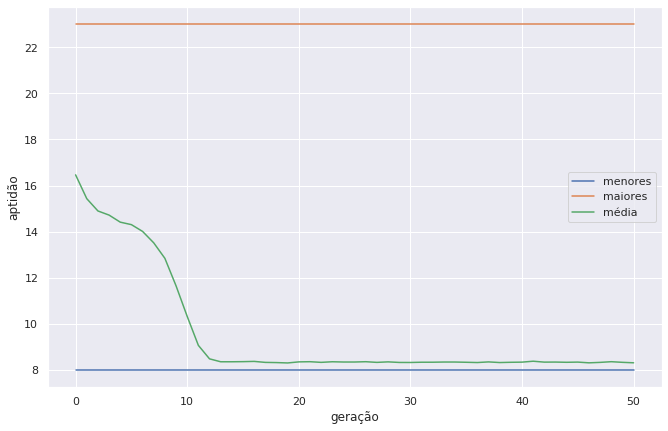

In [19]:
# visualizando graficamente os resultados
plt.figure(figsize=(11, 7))

plt.plot(menores, label='menores')
plt.plot(maiores, label='maiores')
plt.plot(media, label='média')
plt.xlabel('geração')
plt.ylabel('aptidão')
plt.legend(loc=0)
plt.show()

In [21]:
# instalando session_info para salvar as versões das bibliotecas/funções utilizadas no notebook.
!pip install session_info

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 63 kB 2.1 MB/s 
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8048 sha256=b6ce875207329782f3ad60aa7dab854fc77c09f09c398839babe7f680730bb38
  Stored in directory: /root/.cache/pip/wheels/bd/ad/14/6a42359351a18337a8683854cfbba99dd782271f2d1767f87f
Successfully built session-info


In [22]:
# importando a biblioteca
import session_info as si

# visualizando as versões das bibliotecas e/ou funções utilizadas no notebook
si.show(html=False)

-----
deap                1.3
matplotlib          3.2.2
numpy               1.21.6
seaborn             0.11.2
session_info        1.0.0
-----
IPython             7.9.0
jupyter_client      6.1.12
jupyter_core        4.11.1
notebook            5.3.1
-----
Python 3.7.13 (default, Apr 24 2022, 01:04:09) [GCC 7.5.0]
Linux-5.4.188+-x86_64-with-Ubuntu-18.04-bionic
-----
Session information updated at 2022-08-21 11:39
